The score is 582.16780


0.8125001383523522

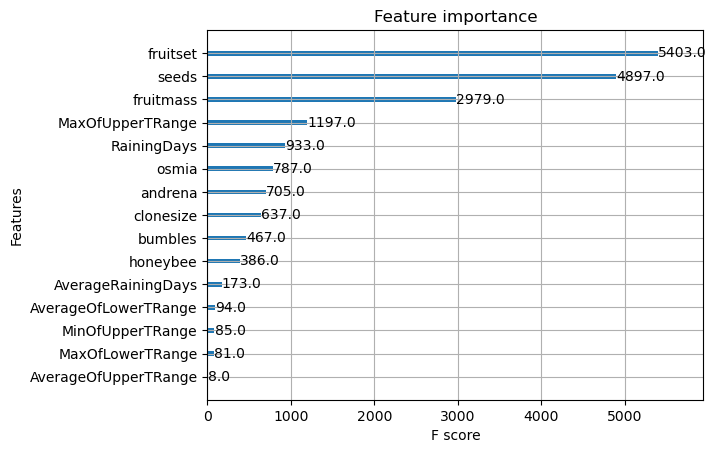

In [48]:
import pandas as pd  
import numpy as np 
import  xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import mean_squared_error


df = pd.read_csv('train.csv', index_col=[0])
df.head(5)

#df.info()

#df.isna().sum()
#df.drop(['AverageOfUpperTRange'],axis=1)

X = df.drop('yield', axis=1)
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size= 0.2)

# regressor = xgb.XGBRegressor(eval_metric = 'rmsle')
# param_grid = {"max_depth":    [4, 5, 6],
#               "n_estimators": [500, 600, 700],
#               "learning_rate": [0.01, 0.015],
#               }

# search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

# print("The best hyperparameters are ",search.best_params_)


def xgb_train(X_train, X_test):
    model_params = {
         'objective': 'reg:squarederror',
         'boosting_type': 'gbtree',
         'learning_rate': 0.01,
         'n_estimators': 700,
         'max_depth': 5,
         'verbosity': 0,
         'early_stopping_rounds': 50,
     }
    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train, eval_set=[(X_test,y_test)], verbose=0)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("The score is %.5f" % rmse)
    return model  

model = xgb_train(X_train,X_test)

xgb.plot_importance(model,ax=plt.gca())

test_pred = model.predict(X_test)

submission = pd.read_csv('sample_submission.csv')

submission['product_yield'] = pd.Series(test_pred)
submission.to_csv('submission.csv', index = False)
 
model.score(X_test, y_test)










